# Selection Variable

In [322]:
# Communication은 의미없는 변수라고 판단
# Miss_Handle_df.drop(['Communication'], axis = 1, inplace = True)

In [323]:
# 최종 변수에 대한 결측치
Miss_Handle_df.isna().sum()

Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
Call_StartHour      0
Call_Duration       0
dtype: int64

# Feature Engineering : Not Scaling

In [324]:
# 결측치 데이터 : train
# 결측치 처리한 데이터 : Miss_Handle_df

In [325]:
# 결측치를 처리하기 위해서 제외한 변수열은? : Id, CarInsuarance

In [326]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3971 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                3971 non-null   int64  
 1   Age               3971 non-null   int64  
 2   Job               3952 non-null   object 
 3   Marital           3971 non-null   object 
 4   Education         3807 non-null   object 
 5   Default           3971 non-null   int64  
 6   Balance           3971 non-null   int64  
 7   HHInsurance       3971 non-null   int64  
 8   CarLoan           3971 non-null   int64  
 9   Communication     3074 non-null   object 
 10  LastContactDay    3971 non-null   int64  
 11  LastContactMonth  3971 non-null   object 
 12  NoOfContacts      3971 non-null   int64  
 13  DaysPassed        3971 non-null   int64  
 14  PrevAttempts      3971 non-null   int64  
 15  Outcome           952 non-null    object 
 16  CarInsurance      3971 non-null   int64  


In [327]:
Miss_Handle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3971 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               3971 non-null   int64  
 1   Job               3971 non-null   object 
 2   Marital           3971 non-null   object 
 3   Education         3971 non-null   object 
 4   Default           3971 non-null   int64  
 5   Balance           3971 non-null   int64  
 6   HHInsurance       3971 non-null   int64  
 7   CarLoan           3971 non-null   int64  
 8   Communication     3971 non-null   object 
 9   LastContactDay    3971 non-null   int64  
 10  LastContactMonth  3971 non-null   object 
 11  NoOfContacts      3971 non-null   int64  
 12  DaysPassed        3971 non-null   int64  
 13  PrevAttempts      3971 non-null   int64  
 14  Outcome           3971 non-null   object 
 15  Call_StartHour    3971 non-null   int64  
 16  Call_Duration     3971 non-null   float64


### Feature : Age

In [328]:
## 어떤 변수들을 추가, 생성, 변경 등 작업해야 하는지
# 연속형 변수 목록
# 1. Age : 5개의 구간으로 나눔

In [329]:
Miss_Handle_df['AgeBand']=pd.cut(Miss_Handle_df['Age'],5)
Miss_Handle_df['AgeBand'].dtype

CategoricalDtype(categories=[(17.934, 31.2], (31.2, 44.4], (44.4, 57.6], (57.6, 70.8], (70.8, 84.0]], ordered=True)

In [330]:
# Age의 최소값은?
Miss_Handle_df.Age.describe()

count    3971.000000
mean       41.098716
std        11.371130
min        18.000000
25%        32.000000
50%        39.000000
75%        49.000000
max        84.000000
Name: Age, dtype: float64

In [331]:
Miss_Handle_df.loc[(Miss_Handle_df['Age']>=17) & (Miss_Handle_df['Age']<32),'AgeBin'] = 1
Miss_Handle_df.loc[(Miss_Handle_df['Age']>=32) & (Miss_Handle_df['Age']<45),'AgeBin'] = 2
Miss_Handle_df.loc[(Miss_Handle_df['Age']>=45) & (Miss_Handle_df['Age']<58),'AgeBin'] = 3
Miss_Handle_df.loc[(Miss_Handle_df['Age']>=58) & (Miss_Handle_df['Age']<71),'AgeBin'] = 4
Miss_Handle_df.loc[(Miss_Handle_df['Age']>=71) & (Miss_Handle_df['Age']<85),'AgeBin'] = 5
Miss_Handle_df['AgeBin'] = Miss_Handle_df['AgeBin'].astype(int)

In [332]:
Miss_Handle_df.drop(['AgeBand'],axis=1, inplace=True)

In [333]:
# AgeBin 결측치 확인
Miss_Handle_df.AgeBin.isna().sum()

0

### Feature : Education

In [334]:
## Education
Miss_Handle_df['Education'] = Miss_Handle_df['Education'].replace({'primary':1,'secondary':2,'tertiary':3})

### Feature : balance

In [335]:
# Create balance groups
Miss_Handle_df['BalanceBand']=pd.cut(Miss_Handle_df['Balance'],5)
Miss_Handle_df['BalanceBand'].dtype

CategoricalDtype(categories=[(-3113.645, 8071.0], (8071.0, 19200.0], (19200.0, 30329.0], (30329.0, 41458.0], (41458.0, 52587.0]], ordered=True)

In [336]:
Miss_Handle_df.loc[(Miss_Handle_df['Balance']>=-3200) & (Miss_Handle_df['Balance']<=8071),'BalanceBin'] = 1
Miss_Handle_df.loc[(Miss_Handle_df['Balance']>8071) & (Miss_Handle_df['Balance']<=19200),'BalanceBin'] = 2
Miss_Handle_df.loc[(Miss_Handle_df['Balance']>19200) & (Miss_Handle_df['Balance']<=30329),'BalanceBin'] = 3
Miss_Handle_df.loc[(Miss_Handle_df['Balance']>30329) & (Miss_Handle_df['Balance']<=41458),'BalanceBin'] = 4
Miss_Handle_df.loc[(Miss_Handle_df['Balance']>41458) & (Miss_Handle_df['Balance']<60000),'BalanceBin'] = 5
Miss_Handle_df['BalanceBin'] = Miss_Handle_df['BalanceBin'].astype(int)

In [337]:
Miss_Handle_df.drop(['BalanceBand'],axis=1, inplace=True)

In [338]:
# AgeBin 결측치 확인
# Miss_Handle_df.BalanceBin.isna().sum()

### Feature : LastContactMonth

In [339]:
# 더미변수이므로 별도의 전처리를 하지 않는다.

### Feature : LastContactDay

In [340]:
# 가정사항 : 데이터 셋이 2017년도에 시작했으므로 전년도인 2016년 데이터라고 가정
Miss_Handle_df['LastContactDate'] = Miss_Handle_df.apply(lambda x:datetime.datetime.strptime("%s %s %s" %(2016 ,x['LastContactMonth'],x['LastContactDay']),"%Y %b %d"),axis=1)
Miss_Handle_df['LastContactWeekday'] = Miss_Handle_df['LastContactDate'].dt.weekday

In [341]:
Miss_Handle_df['LastContactWeekday'].value_counts()

5    791
3    774
4    757
6    675
2    428
0    401
1    145
Name: LastContactWeekday, dtype: int64

In [342]:
# 결측치 확인
Miss_Handle_df.LastContactWeekday.isna().sum()

0

### Feature : LastContactWeek

In [343]:
Miss_Handle_df['LastContactWeek'] = Miss_Handle_df['LastContactDate'].dt.week

/var/folders/72/463csspd3tx0ft106d5pb0zh0000gn/T/ipykernel_1291/152774261.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  Miss_Handle_df['LastContactWeek'] = Miss_Handle_df['LastContactDate'].dt.week


In [344]:
Miss_Handle_df['LastContactMonNum'] = Miss_Handle_df['LastContactDate'].dt.month

In [345]:
MonthWeek = Miss_Handle_df.groupby(['LastContactWeek','LastContactMonNum'])['Education'].count().reset_index()
MonthWeek.drop('Education',axis=1, inplace=True)

In [346]:
MonthWeek['LastContactWeekNum']=0

In [347]:
for month in range(1,13):
    i=0
    for idx,row in MonthWeek.iterrows():
        if row['LastContactMonNum']== month:
            i=i+1
            row['LastContactWeekNum']=i

In [348]:
def get_num_of_week(data):
    for idx,row in MonthWeek.iterrows():
        if (data['LastContactWeek']== row['LastContactWeek']) & (data['LastContactMonNum']== row['LastContactMonNum']):
            return row['LastContactWeekNum']

In [349]:
Miss_Handle_df['LastContactWeekNum'] = Miss_Handle_df.apply(lambda i: get_num_of_week(i),axis=1)
print(Miss_Handle_df[['LastContactWeekNum','LastContactWeek','LastContactMonNum']].head(10))

   LastContactWeekNum  LastContactWeek  LastContactMonNum
0                   4                4                  1
1                   4               21                  5
2                   1               22                  6
3                   2               19                  5
4                   1               22                  6
5                   3               20                  5
6                   3               11                  3
7                   2               19                  5
8                   3               46                 11
9                   2               19                  5


In [350]:
Miss_Handle_df.drop(['LastContactDay', 'LastContactDate', 'LastContactWeek', 'LastContactMonNum'],axis=1, inplace=True)

### Feature : Call_StartHour

In [351]:
# Call_StartHour의 경우 기준 시간 - 8을 하여 9시를 단위시간 1로 변경
Miss_Handle_df.Call_StartHour = Miss_Handle_df.Call_StartHour - 8

In [352]:
np.unique(Miss_Handle_df.Call_StartHour)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

### Feature : Call_Duration

In [353]:
# 4. Call_Duration
# 4분 미만 : Short
# 4분 이상 ~ 10분 미만 : Interm
# 10분 이상 ~ 20분 미만 : Long
# 20분 이상 : veryLong
# 실수 타입!

Miss_Handle_df.loc[Miss_Handle_df['Call_Duration'] <= 3, 'CallDumy'] = 1
Miss_Handle_df.loc[(Miss_Handle_df['Call_Duration'] > 3) & (Miss_Handle_df['Call_Duration'] <= 10), 'CallDumy'] = 2
Miss_Handle_df.loc[(Miss_Handle_df['Call_Duration'] > 10) & (Miss_Handle_df['Call_Duration'] <= 20), 'CallDumy'] = 3

Miss_Handle_df.loc[(Miss_Handle_df['Call_Duration'] > 20), 'CallDumy'] = 4


Miss_Handle_df['CallDumy'] = Miss_Handle_df['CallDumy'].astype(int)

In [354]:
Miss_Handle_df.CallDumy.isna().sum()

0

In [355]:
np.unique(Miss_Handle_df.CallDumy)

array([1, 2, 3, 4])

In [356]:
# Call_Duration 제거하지 않음 train/test split 후 제거

### Feature : NoOfContacts

In [357]:
# 5. NoOfContacts
# 1회 : Fir
# 2회 : Sec
# 3회 : Third
Miss_Handle_df.loc[Miss_Handle_df['NoOfContacts'] == 1, 'NumConDumy'] = 1
Miss_Handle_df.loc[(Miss_Handle_df['NoOfContacts'] == 2), 'NumConDumy'] = 2
Miss_Handle_df.loc[(Miss_Handle_df['NoOfContacts'] >= 3), 'NumConDumy'] = 3
Miss_Handle_df['NumConDumy'] = Miss_Handle_df['NumConDumy'].astype(int)

In [358]:
np.unique(Miss_Handle_df.NumConDumy)

array([1, 2, 3])

In [359]:
Miss_Handle_df.NumConDumy.isna().sum()

0

In [360]:
# NoOfContacts 제거

In [361]:
Miss_Handle_df.drop(['NoOfContacts'],axis=1, inplace=True)

### Feature : DaysPassed

In [362]:
# 6. DaysPassed

# 1. 이전에 접촉이 없었음 : None
# 2. 0일 ~ 59일 (2달 미만) : Short

In [363]:
Miss_Handle_df.loc[Miss_Handle_df['DaysPassed'] < 0, 'DayPassedDumy'] = 0
Miss_Handle_df.loc[(Miss_Handle_df['DaysPassed'] >= 0) , 'DayPassedDumy'] = 1
Miss_Handle_df['DayPassedDumy'] = Miss_Handle_df['DayPassedDumy'].astype(int)

In [364]:
np.unique(Miss_Handle_df.DayPassedDumy)

array([0, 1])

In [365]:
# DaysPassed 제거

In [366]:
Miss_Handle_df.drop(['DaysPassed'],axis=1, inplace=True)

### Feature : PrevAttempts

In [367]:
# 7. PrevAttempts
# 이전 접촉 무 : None_Prev_Attempt, 0으로도 가능
# 이전 접촉 유 : Is_Prev_Attempt, 1로도 가능

In [368]:
Miss_Handle_df.loc[Miss_Handle_df['PrevAttempts'] == 0, 'PrevAttemptsDumy'] = 0
Miss_Handle_df.loc[Miss_Handle_df['PrevAttempts'] >= 1, 'PrevAttemptsDumy'] = 1

In [369]:
Miss_Handle_df['PrevAttemptsDumy'] = Miss_Handle_df['PrevAttemptsDumy'].astype(int)

In [370]:
np.unique(Miss_Handle_df.PrevAttemptsDumy)

array([0, 1])

In [371]:
# PrevAttempts 제거

In [372]:
Miss_Handle_df.drop(['PrevAttempts'],axis=1, inplace=True)

In [373]:
## 최종 점검 ##

In [374]:
Miss_Handle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3971 entries, 0 to 3999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 3971 non-null   int64  
 1   Job                 3971 non-null   object 
 2   Marital             3971 non-null   object 
 3   Education           3971 non-null   int64  
 4   Default             3971 non-null   int64  
 5   Balance             3971 non-null   int64  
 6   HHInsurance         3971 non-null   int64  
 7   CarLoan             3971 non-null   int64  
 8   Communication       3971 non-null   object 
 9   LastContactMonth    3971 non-null   object 
 10  Outcome             3971 non-null   object 
 11  Call_StartHour      3971 non-null   int64  
 12  Call_Duration       3971 non-null   float64
 13  AgeBin              3971 non-null   int64  
 14  BalanceBin          3971 non-null   int64  
 15  LastContactWeekday  3971 non-null   int64  
 16  LastCo

In [375]:
# Communication 제거
Miss_Handle_df.drop(['Communication'], axis = 1, inplace=True)

## Assembling Final Datasets

In [379]:
# Spilt numeric and categorical features
obj_feats = Miss_Handle_df.select_dtypes(include=['object']).columns
number_feats = Miss_Handle_df.select_dtypes(include=['float64','int64']).columns
number_df = Miss_Handle_df[number_feats]
obj_df = Miss_Handle_df[obj_feats]
print('There are %d numeric features and %d categorical features\n' %(len(number_feats),len(obj_feats)))
print('Numeric features:\n',number_feats.values)
print('Categorical features:\n',obj_feats.values)

There are 16 numeric features and 4 categorical features

Numeric features:
 ['Age' 'Education' 'Default' 'Balance' 'HHInsurance' 'CarLoan'
 'Call_StartHour' 'Call_Duration' 'AgeBin' 'BalanceBin'
 'LastContactWeekday' 'LastContactWeekNum' 'CallDumy' 'NumConDumy'
 'DayPassedDumy' 'PrevAttemptsDumy']
Categorical features:
 ['Job' 'Marital' 'LastContactMonth' 'Outcome']


In [380]:
# One hot encoding
obj_df = pd.get_dummies(obj_df)

In [381]:
# Merge all features
ColdCalls_df = pd.concat([number_df, obj_df],axis=1)

# 종속변수
target = train.CarInsurance

In [382]:
ColdCalls_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3971 entries, 0 to 3999
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   3971 non-null   int64  
 1   Education             3971 non-null   int64  
 2   Default               3971 non-null   int64  
 3   Balance               3971 non-null   int64  
 4   HHInsurance           3971 non-null   int64  
 5   CarLoan               3971 non-null   int64  
 6   Call_StartHour        3971 non-null   int64  
 7   Call_Duration         3971 non-null   float64
 8   AgeBin                3971 non-null   int64  
 9   BalanceBin            3971 non-null   int64  
 10  LastContactWeekday    3971 non-null   int64  
 11  LastContactWeekNum    3971 non-null   int64  
 12  CallDumy              3971 non-null   int64  
 13  NumConDumy            3971 non-null   int64  
 14  DayPassedDumy         3971 non-null   int64  
 15  PrevAttemptsDumy     

In [383]:
## Scale 전과 Scale 후로 데이터를 복사함

In [384]:
No_Scale_ColdCalls_df = ColdCalls_df.copy()
Scale_ColdCalls_df = ColdCalls_df.copy()

In [385]:
## No_Scale_ColdCalls_df에서는 Age, Balance, Call_Duration을 삭제
No_Scale_ColdCalls_df.drop(['Age', 'Balance', 'Call_Duration'], axis = 1, inplace=True)

In [386]:
## Scale_ColdCalls_df에서는 AgeBin, BalanceBin, CallDumy를 삭제
Scale_ColdCalls_df.drop(['AgeBin', 'BalanceBin', 'CallDumy'], axis = 1, inplace=True)

In [387]:
# Split train and test
x_train, x_test, y_train, y_test = train_test_split(No_Scale_ColdCalls_df, target, test_size=0.2, shuffle=True, stratify=target, random_state=2022)

# Split train and test
scale_x_train, scale_x_test, scale_y_train, scale_y_test = train_test_split(Scale_ColdCalls_df, target, test_size=0.2, shuffle=True, stratify=target, random_state=2022)

# Feature Engineering :  Robust Scaling

In [388]:
# # 이상치가 있는 경우 사용 - Age, Balance, Call_Duration
from sklearn.preprocessing import RobustScaler

In [389]:
# Age RobustScaler
rb_scaler = RobustScaler()
Age_rb_scaler = rb_scaler.fit(scale_x_train[['Age']])
scale_x_train.Age = Age_rb_scaler.transform(scale_x_train[['Age']])
scale_x_test.Age =  Age_rb_scaler.transform(scale_x_test[['Age']])

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [390]:
scale_x_train.Age.head(5)

660     1.000000
1674    0.000000
3672   -0.235294
3891   -0.529412
1609    0.000000
Name: Age, dtype: float64

In [391]:
scale_x_test.Age.head(5)

2199    0.529412
3057   -0.941176
1945    0.882353
3650    0.411765
3279   -0.117647
Name: Age, dtype: float64

In [392]:
# Balance RobustScaler
rb_scaler2 = RobustScaler()
Balance_rb_scaler = rb_scaler2.fit(scale_x_train[['Balance']])
scale_x_train.Balance = Balance_rb_scaler.transform(scale_x_train[['Balance']])
scale_x_test.Balance =  Balance_rb_scaler.transform(scale_x_test[['Balance']])

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [393]:
scale_x_train.Balance.head(5)

660    -1.164519
1674    0.714644
3672    4.362510
3891    0.284184
1609    1.505941
Name: Balance, dtype: float64

In [394]:
scale_x_test.Balance.head(5)

2199    0.189121
3057    0.118159
1945    1.775063
3650    3.103264
3279   -0.371213
Name: Balance, dtype: float64

In [395]:
# Call_Duration RobustScaler
rb_scaler3 = RobustScaler()
Call_Duration_rb_scaler = rb_scaler3.fit(scale_x_train[['Call_Duration']])
scale_x_train.Call_Duration = Call_Duration_rb_scaler.transform(scale_x_train[['Call_Duration']])
scale_x_test.Call_Duration =  Call_Duration_rb_scaler.transform(scale_x_test[['Call_Duration']])

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [396]:
scale_x_train.Call_Duration.head(5)

660     0.450893
1674   -0.087798
3672   -0.025298
3891   -0.352679
1609   -0.296131
Name: Call_Duration, dtype: float64

In [397]:
scale_x_test.Call_Duration.head(5)

2199   -0.346726
3057    0.427083
1945   -0.129464
3650   -0.471726
3279   -0.504464
Name: Call_Duration, dtype: float64

In [398]:
No_Scale_ColdCalls_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3971 entries, 0 to 3999
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Education             3971 non-null   int64
 1   Default               3971 non-null   int64
 2   HHInsurance           3971 non-null   int64
 3   CarLoan               3971 non-null   int64
 4   Call_StartHour        3971 non-null   int64
 5   AgeBin                3971 non-null   int64
 6   BalanceBin            3971 non-null   int64
 7   LastContactWeekday    3971 non-null   int64
 8   LastContactWeekNum    3971 non-null   int64
 9   CallDumy              3971 non-null   int64
 10  NumConDumy            3971 non-null   int64
 11  DayPassedDumy         3971 non-null   int64
 12  PrevAttemptsDumy      3971 non-null   int64
 13  Job_admin.            3971 non-null   uint8
 14  Job_blue-collar       3971 non-null   uint8
 15  Job_entrepreneur      3971 non-null   uint8
 16  Job_ho

In [399]:
Scale_ColdCalls_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3971 entries, 0 to 3999
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   3971 non-null   int64  
 1   Education             3971 non-null   int64  
 2   Default               3971 non-null   int64  
 3   Balance               3971 non-null   int64  
 4   HHInsurance           3971 non-null   int64  
 5   CarLoan               3971 non-null   int64  
 6   Call_StartHour        3971 non-null   int64  
 7   Call_Duration         3971 non-null   float64
 8   LastContactWeekday    3971 non-null   int64  
 9   LastContactWeekNum    3971 non-null   int64  
 10  NumConDumy            3971 non-null   int64  
 11  DayPassedDumy         3971 non-null   int64  
 12  PrevAttemptsDumy      3971 non-null   int64  
 13  Job_admin.            3971 non-null   uint8  
 14  Job_blue-collar       3971 non-null   uint8  
 15  Job_entrepreneur     

# Feature Engineering :  Min-Max Scaling

In [400]:
# Call_StartHour에 대해서 MinMax Scale 수행

In [401]:
from sklearn.preprocessing import MinMaxScaler

In [402]:
mm_scaler = MinMaxScaler()
Call_StartHour_mm_scaler = mm_scaler.fit(scale_x_train[['Call_StartHour']])
scale_x_train.Call_StartHour = Call_StartHour_mm_scaler.transform(scale_x_train[['Call_StartHour']])
scale_x_test.Call_StartHour =  Call_StartHour_mm_scaler.transform(scale_x_test[['Call_StartHour']])

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [403]:
scale_x_train.Call_StartHour.head()

660     1.000
1674    0.375
3672    0.125
3891    0.500
1609    0.750
Name: Call_StartHour, dtype: float64

In [404]:
scale_x_test.Call_StartHour.head()

2199    0.250
3057    0.125
1945    0.250
3650    0.250
3279    0.875
Name: Call_StartHour, dtype: float64

# Feature Engineering :  Dimension Reduction

## PCA : train_x, test_x

In [405]:
from sklearn.decomposition import PCA

In [406]:
pca = PCA()
pca.fit(x_train)
pca_x_train = pca.transform(x_train)
pca_x_test = pca.transform(x_test)

In [407]:
ratio = pca.explained_variance_ratio_

df_v = pd.DataFrame(ratio, columns=['V_ration'])

cumsum_ratio = np.cumsum(df_v.V_ration)

df_v['cumsum_ratio'] = cumsum_ratio

df_v[cumsum_ratio <= 0.85]

V_ration  cumsum_ratio
0  0.375981      0.375981
1  0.191468      0.567449
2  0.088351      0.655800
3  0.057954      0.713754
4  0.043076      0.756830
5  0.035866      0.792696
6  0.033321      0.826017

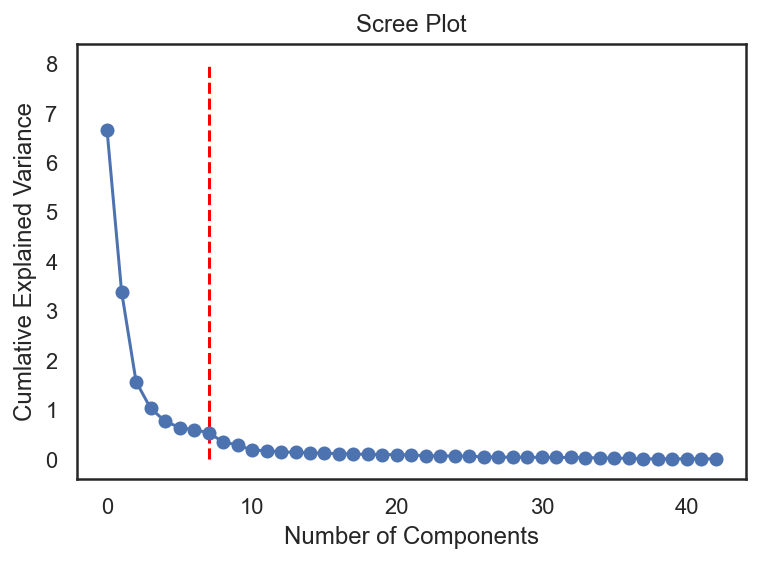

In [408]:
with sns.axes_style('white'):
    plt.title('Scree Plot')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumlative Explained Variance')
    plt.plot(pca.explained_variance_, 'o-')
    plt.vlines(7, 0, 8, color = 'red', linestyle = '--')

In [409]:
### 선택하는 주 성분의 개수 : 7개 ###

pca = PCA(n_components = 7)
pca.fit(x_train)
pca_x_train = pca.transform(x_train)
pca_x_test = pca.transform(x_test)

In [410]:
### PCA 그래프 그려보기 ###

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

import plotly.express as px

fig = px.scatter_matrix(
pca_x_train,
labels=labels,
dimensions=range(4),
color= y_train)
fig.update_traces(diagonal_visible=False)
fig.show()

/var/folders/72/463csspd3tx0ft106d5pb0zh0000gn/T/ipykernel_1291/811861681.py:20: MatplotlibDeprecationWarning:

Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().



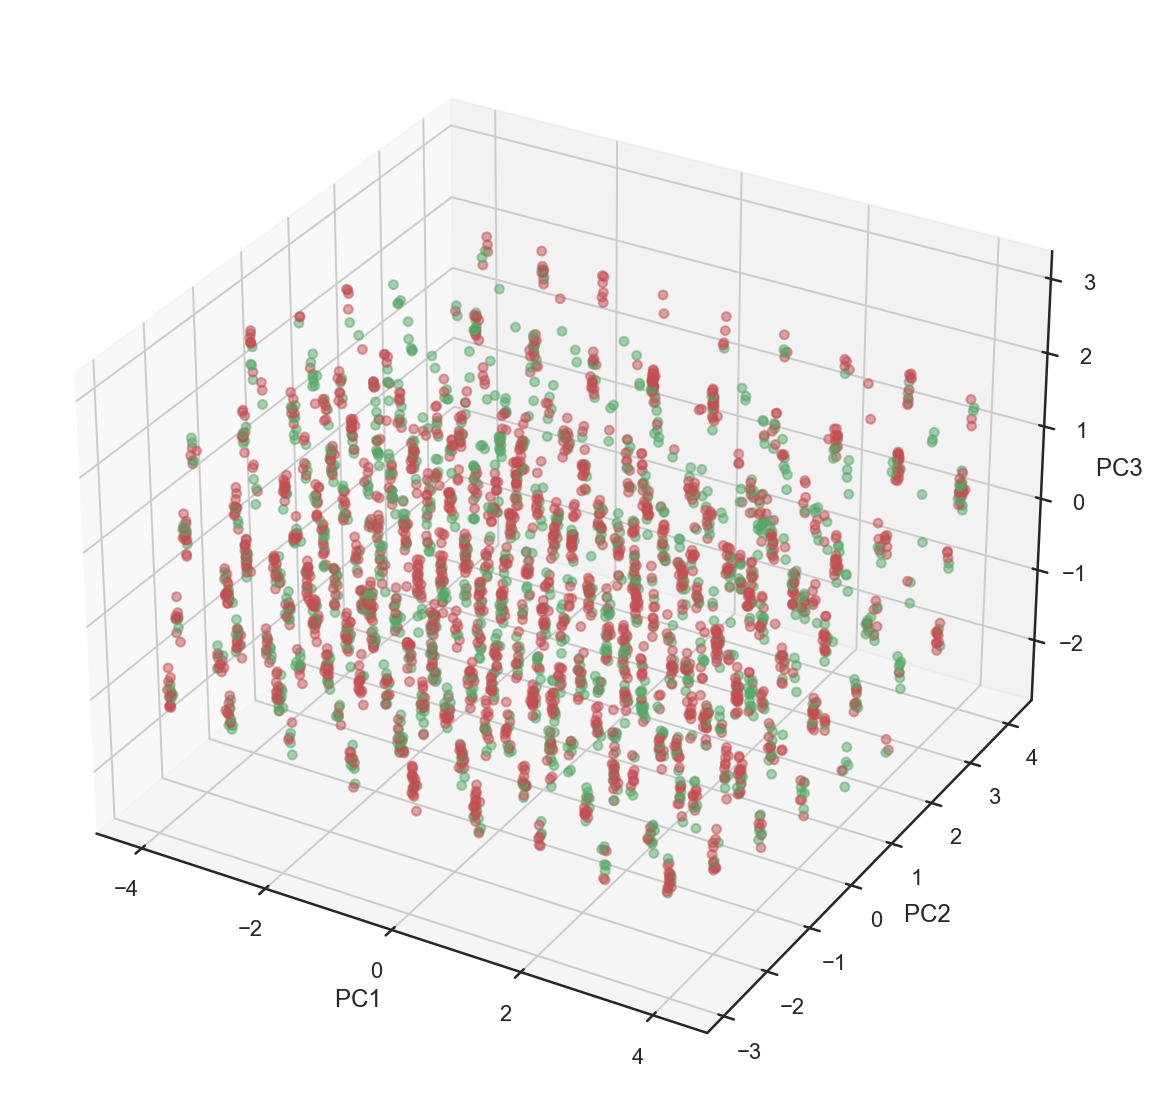

In [412]:
# PCA 3차원 그래프

label_a ={'PCA_1':pca_x_train[:,0],
   'PCA_2':pca_x_train[:,1],
   'PCA_3':pca_x_train[:,2],
#   'PCA_4':X_train_pca[:,3],
   'DepVar':y_train}

df_train_pca = pd.DataFrame(label_a)

color=[]
for n in y_train:
    if n==0:
        color.append('r')
    else:
        color.append('g')
with sns.axes_style('white'):
        
    fig = plt.figure(figsize = (10,10))
    ax = fig.gca(projection='3d' )
    ax.scatter( xs = df_train_pca.loc [:, :] [ "PCA_1"], 
                ys = df_train_pca.loc [:, :] [ "PCA_2"], 
                zs = df_train_pca.loc [:, :] [ "PCA_3"],
                alpha=0.5,c=color)

    ax.set_xlabel ('PC1 ') 
    ax.set_ylabel ('PC2 ') 
    ax.set_zlabel ('PC3 ') 
    plt.show()

## PCA : scale_train_x, scale_test_x

In [413]:
pca2 = PCA()
pca2.fit(scale_x_train)
pca_scale_x_train = pca2.transform(scale_x_train)
pca_scale_x_test = pca2.transform(scale_x_test)

In [414]:
ratio = pca2.explained_variance_ratio_

df_v = pd.DataFrame(ratio, columns=['V_ration'])

cumsum_ratio = np.cumsum(df_v.V_ration)

df_v['cumsum_ratio'] = cumsum_ratio

df_v[cumsum_ratio <= 0.81]

V_ration  cumsum_ratio
0  0.283492      0.283492
1  0.220045      0.503536
2  0.102093      0.605629
3  0.063893      0.669522
4  0.050747      0.720269
5  0.043218      0.763487
6  0.037531      0.801018

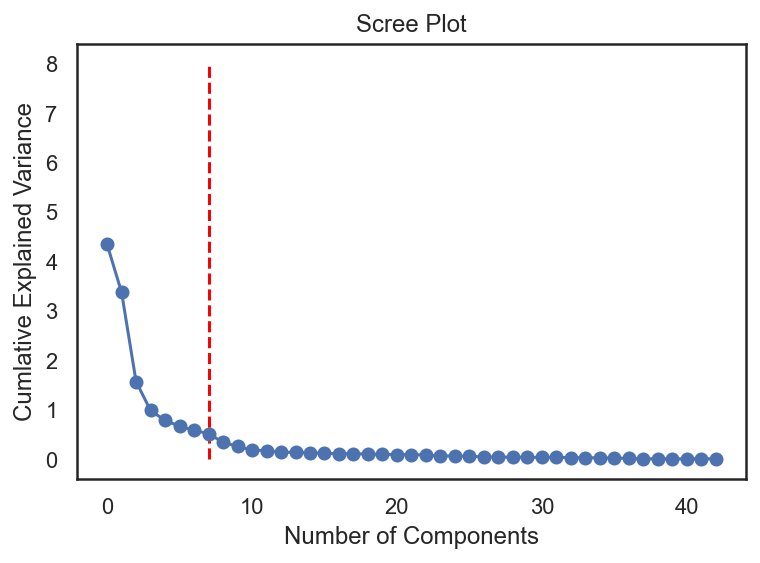

In [415]:
with sns.axes_style('white'):
    plt.title('Scree Plot')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumlative Explained Variance')
    plt.plot(pca2.explained_variance_, 'o-')
    plt.vlines(7, 0, 8, color = 'red', linestyle = '--')

In [416]:
### 선택하는 주 성분의 개수 : 7개 ###

pca2 = PCA(n_components = 7)
pca2.fit(scale_x_train)
pca_scale_x_train = pca2.transform(scale_x_train)
pca_scale_x_test = pca2.transform(scale_x_test)

In [417]:
### PCA 그래프 그려보기 ###

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca2.explained_variance_ratio_ * 100)
}

import plotly.express as px

fig = px.scatter_matrix(
pca_scale_x_train,
labels=labels,
dimensions=range(4),
color= scale_y_train)
fig.update_traces(diagonal_visible=False)
fig.show()

/var/folders/72/463csspd3tx0ft106d5pb0zh0000gn/T/ipykernel_1291/2939915862.py:20: MatplotlibDeprecationWarning:

Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().



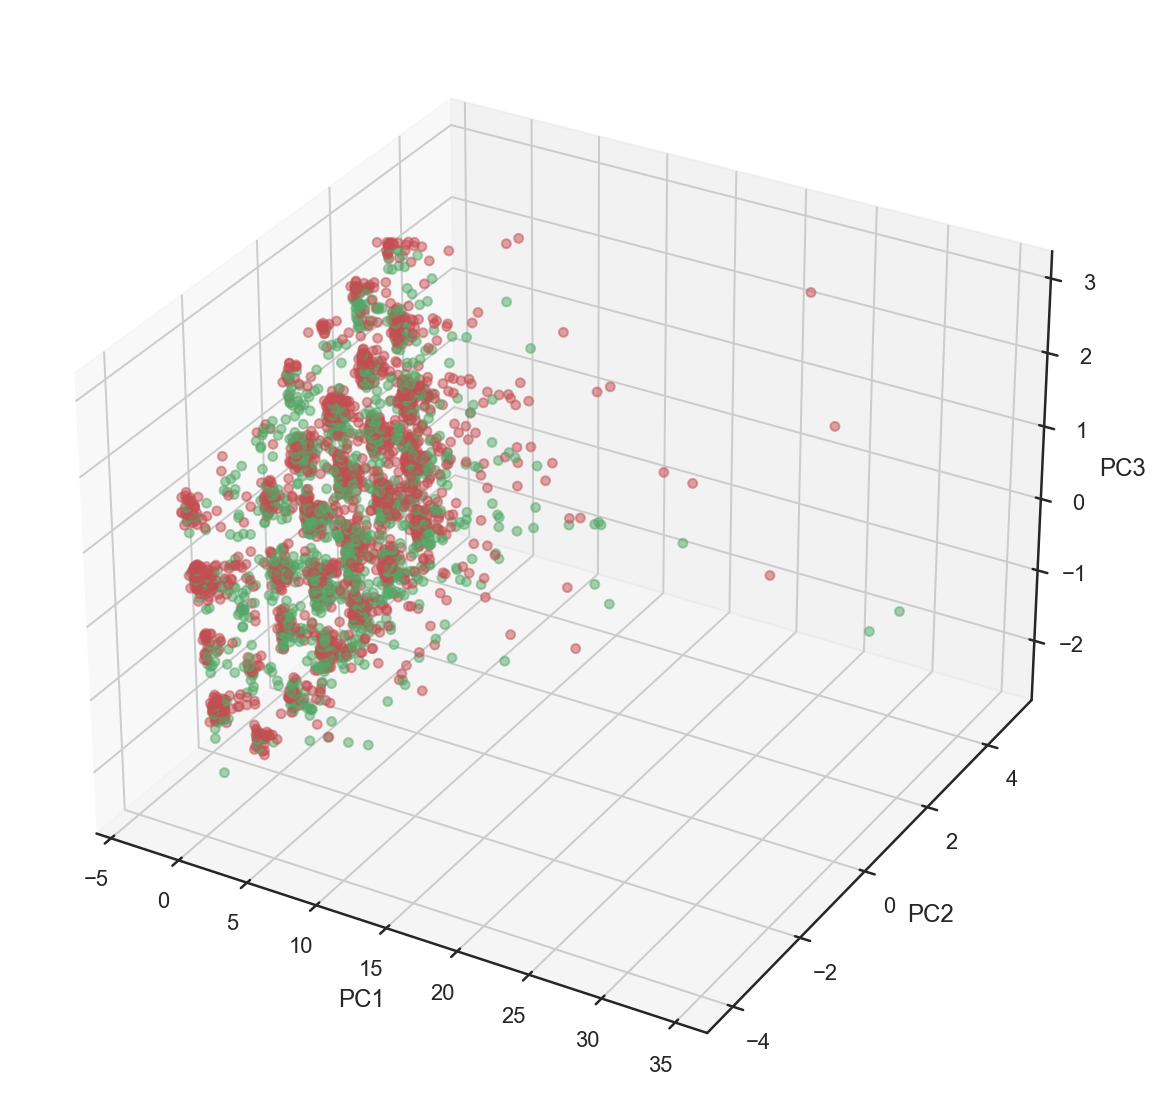

In [418]:
# PCA 3차원 그래프

label_b ={'PCA_1':pca_scale_x_train[:,0],
   'PCA_2':pca_scale_x_train[:,1],
   'PCA_3':pca_scale_x_train[:,2],
#   'PCA_4':X_train_pca[:,3],
   'DepVar':scale_y_train}

df_scale_train_pca = pd.DataFrame(label_b)

color=[]
for n in y_train:
    if n==0:
        color.append('r')
    else:
        color.append('g')
with sns.axes_style('white'):
        
    fig = plt.figure(figsize = (10,10))
    ax = fig.gca(projection='3d' )
    ax.scatter( xs = df_scale_train_pca.loc [:, :] [ "PCA_1"], 
                ys = df_scale_train_pca.loc [:, :] [ "PCA_2"], 
                zs = df_scale_train_pca.loc [:, :] [ "PCA_3"],
                alpha=0.5,c=color)

    ax.set_xlabel ('PC1') 
    ax.set_ylabel ('PC2') 
    ax.set_zlabel ('PC3') 
    plt.show()

## Until now, dataset explain..
### x_train, y_train, x_test, y_test : no scale
### scale_x_train, scale_y_train, scale_x_test, scale_y_test : Robust scale (Age, Balance, Callduration)
### pca_x_train, pca_y_train, x_test, y_test : pca + no scale
### pca_scale_x_train, scale_y_train, pca_scale_x_test, scale_y_test : pca + scale
### Thank you~